# Likelihood Ratio

The likelihood ratio quantifies **how much more probable our observed data** is under one model compared to another, providing a natural way to choose between competing explanations of the data.

# Graphical Summary

![likelihood](./graphical_summary/Slide21.png)

# Key Formula

The likelihood ratio between Model 1 and Model 2 is:

$$
\text{LR} = \frac{L(\text{D}|\text{M}_1)}{L(\text{D}|\text{M}_2)}
$$

Where:
- $\text{LR}$ is the likelihood ratio
- $L(\text{D}|\text{M}_1)$ is the likelihood under Model 1
- $L(\text{D}|\text{M}_2)$ is the likelihood under Model 2
- $\text{D}$ represents the observed data

# Technical Details

## Interpretation
For the likelihood ratio (LR):
- $\text{LR} > 1$: Model 1 better explains the data (higher likelihood)
- $\text{LR} < 1$: Model 2 better explains the data (higher likelihood)
- $\text{LR} = 1$: Both models explain the data equally well

## Parameter $\theta$ in a model

Suppose that, now instead of having two fully-specified models, we consider a model $M_1$ with a parameter space $\Theta$. 

The corresponding hypothesis ($H_1$) is often stated by saying that the parameter $\theta$ lies in a specified subset $\Theta_1$ of $\Theta$. And another hypothesis ($H_2$) which believes that $\theta$ lies in the $\Theta_2$. The likelihood ratio test statistic between those two hypothesis is given by:

$$
LR = \frac {~\sup_{\theta \in \Theta_1}{\mathcal{L}}(\theta)~}{~\sup_{\theta \in \Theta_2}{\mathcal{L}}(\theta)~}
$$

Here, the $\sup$ notation refers to the supremum. If $\Theta_1$ is a subset of $\Theta_2$, e.g., $\Theta_2 = \Theta$, as the constrained maximum cannot exceed the unconstrained maximum, the likelihood ratio is bounded between zero and one. 

## Properties
- The likelihood ratio is always non-negative: $\text{LR} \geq 0$
- Can be used to compare any two models/hypothesis
- Forms the basis for many statistical tests and model selection criteria

# Example

Here we continue the example used in the `likelihood` notebook.

In this example, we use the likelihood ratio to determine which genetic variants are associated with height in a small genetic association study. Using the same data from 5 individuals at 3 genetic variants, we compare two competing models: Model 1 ($\beta=0$) assuming no genetic effect, and Model 2 ($\beta=0.5$) assuming a mediate genetic effect. 

After calculating the likelihood for each model across all variants, we compute the likelihood ratio (LR) to quantify the relative support for each model. This approach allows us to identify which genetic variants, if any, show evidence of association with the height phenotype, providing a statistical framework for genetic association testing.

In [1]:
# Clear the environment
rm(list = ls())

# Define genotypes for 5 individuals at 3 variants
# These represent actual alleles at each position
# For example, Individual 1 has genotypes: CC, CT, AT
genotypes <- c(
    "CC", "CT", "AT", # Individual 1
    "TT", "TT", "AA", # Individual 2
    "CT", "CT", "AA", # Individual 3
    "CC", "TT", "AA", # Individual 4
    "CC", "CC", "TT" # Individual 5
)
# Reshape into a matrix
N <- 5 # number of individuals
M <- 3 # number of variants
geno_matrix <- matrix(genotypes, nrow = N, ncol = M, byrow = TRUE)
rownames(geno_matrix) <- paste("Individual", 1:N)
colnames(geno_matrix) <- paste("Variant", 1:M)

alt_alleles <- c("T", "C", "T")
ref_alleles <- c("C", "T", "A")

# Convert to raw genotype matrix using the additive / dominant / recessive model
Xraw_additive <- matrix(0, nrow = N, ncol = M) # dount number of non-reference alleles

rownames(Xraw_additive) <- rownames(geno_matrix)
colnames(Xraw_additive) <- colnames(geno_matrix)

for (i in 1:N) {
    for (j in 1:M) {
        alleles <- strsplit(geno_matrix[i, j], "")[[1]]
        Xraw_additive[i, j] <- sum(alleles == alt_alleles[j])
    }
}
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)

# assign observed height for the 5 individuals
Y_raw <- c(180, 160, 158, 155, 193)
Y <- scale(Y_raw)

In [2]:
# Likelihood function for normal distribution
likelihood <- function(beta, sd, X, Y) {
    # beta: effect size parameter
    # sd: standard deviation of residuals
    # X: genotype values
    # Y: observed phenotype values

    # Calculate expected values under the model
    mu <- X * beta

    # Calculate likelihood (product of normal densities)
    prod(dnorm(Y, mean = mu, sd = sd, log = FALSE))
}

In [3]:
# Apply the likelihood function to three models for each variant
sd_assumed <- 1 # Assume standard deviation of 1 for our standardized data

# Initialize results table
likelihood_table <- data.frame(
    Variant = paste("Variant", 1:ncol(X)),
    L_Model1 = ncol(X),
    L_Model2 = ncol(X),
    L_Model3 = ncol(X),
    LogL_Model1 = ncol(X),
    LogL_Model2 = ncol(X),
    LogL_Model3 = ncol(X)
)

# Test all 3 variants
for (variant_idx in 1:ncol(X)) {
    X_j <- X[, variant_idx] # Genotypes for variant j

    # Calculate likelihoods
    likelihood_table[variant_idx, "L_Model1"] <- likelihood(beta = 0, sd = sd_assumed, X = X_j, Y = Y)
    likelihood_table[variant_idx, "L_Model2"] <- likelihood(beta = 0.5, sd = sd_assumed, X = X_j, Y = Y)
    likelihood_table[variant_idx, "L_Model3"] <- likelihood(beta = 1.0, sd = sd_assumed, X = X_j, Y = Y)

    # Calculate log-likelihoods
    likelihood_table[variant_idx, "LogL_Model1"] <- sum(dnorm(Y, mean = X_j * 0, sd = sd_assumed, log = TRUE))
    likelihood_table[variant_idx, "LogL_Model2"] <- sum(dnorm(Y, mean = X_j * 0.5, sd = sd_assumed, log = TRUE))
    likelihood_table[variant_idx, "LogL_Model3"] <- sum(dnorm(Y, mean = X_j * 1.0, sd = sd_assumed, log = TRUE))
}
likelihood_table


Variant,L_Model1,L_Model2,L_Model3,LogL_Model1,LogL_Model2,LogL_Model3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Variant 1,0.001367607,0.0003050987,2.503945e-05,-6.594693,-8.094875,-10.595058
Variant 2,0.001367607,0.0045633971,5.601711e-03,-6.594693,-5.389688,-5.184683
Variant 3,0.001367607,0.0059679052,9.580496e-03,-6.594693,-5.121359,-4.648026


Now let's compute the **likelihood ratio** between $M_1$ and $M_3$ as an example (the same procedure also applies to any other pair of models).

In [4]:
# add new columns for LR between model 1 and model 2
likelihood_table$LR_Model1_vs_Model2 = likelihood_table$L_Model1 / likelihood_table$L_Model2

# Display results
likelihood_table

Variant,L_Model1,L_Model2,L_Model3,LogL_Model1,LogL_Model2,LogL_Model3,LR_Model1_vs_Model2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Variant 1,0.001367607,0.0003050987,2.503945e-05,-6.594693,-8.094875,-10.595058,4.4825078
Variant 2,0.001367607,0.0045633971,5.601711e-03,-6.594693,-5.389688,-5.184683,0.2996906
Variant 3,0.001367607,0.0059679052,9.580496e-03,-6.594693,-5.121359,-4.648026,0.2291603


Based on the observed data from the five individuals, the likelihood ratio results indicate that Variant 1 favors Model 1 more than Model 2 (LR = 4.483), while Variants 2 and 3 show some level of evidence of association with height (LR < 1, favoring Model 2) compared to Model 1. Variant 2 demonstrates the strongest association (LR = 0.300), suggesting it has the most significant genetic effect on height among the three variants tested.

# Supplementary
- The **"likelihood ratio"** that compares two fully-specified (discrete) models is simply the ratio of the likelihood for the two models given data $D$: 

$$
LR(M_2, M_1) := \frac{L(M_2)}{L(M_1)} = \frac{p(D|M_2)}{p(D|M_1)}
$$

where $L(M)$ denotes the likelihood for model $M$ under data $x$.

- The **"log-likelihood ratio"** is defined as the logarithm of the likelihood ratio:

$$
LLR(M_2, M_1) := - 2 \log \left( \frac{L(M_1)}{L(M_2)} \right) = - 2 \left[ \log L(M_1) - \log L(M_2) \right] = - 2 \left[ l(M_1) - l(M_2) \right]
$$

where $l(M_i)$ denotes the log-likelihood for model $M_i$ under data $x$. The log-likelihood ratio measures the relative support for model $M_2$ over model $M_1$ on a **logarithmic scale**.

- A natural question is,  **what value of the LR (or LLR) should we treat as "convincing" evidence for one model vs another**? The short answer here is that this is **context dependent**, which depends on the relative plausibility of the models we are comparing. For more discussions, refer to this [notes](https://stephens999.github.io/fiveMinuteStats/LR_and_BF.html) by Matthew Stephens.

## Graphical Summary

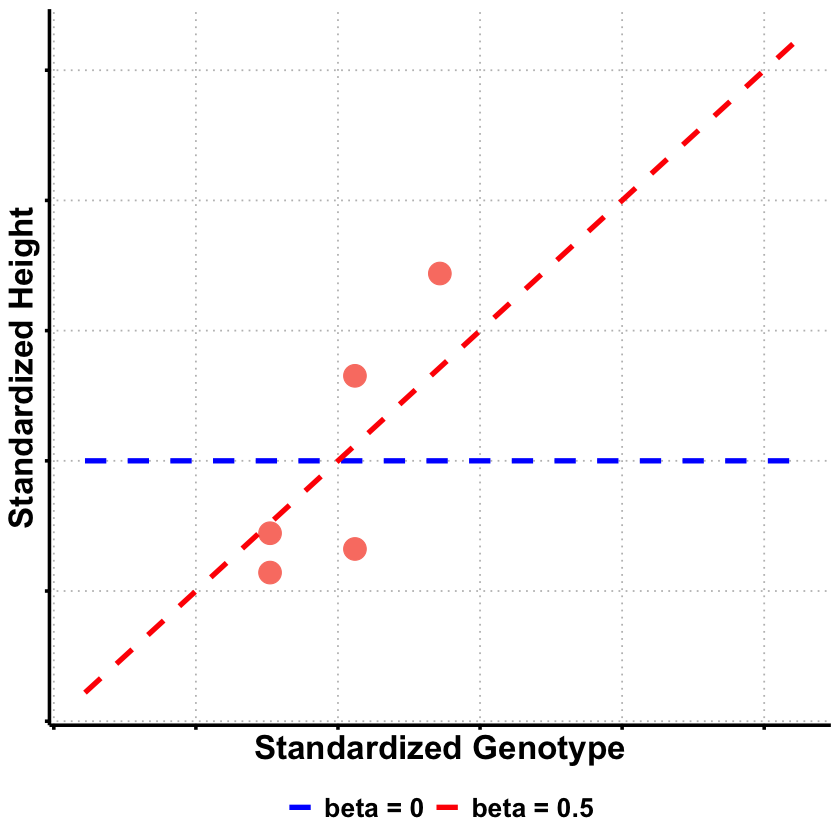

In [8]:
library(ggplot2)
library(dplyr)
# Prepare the data
# Let's use the last individual as an example
ind_idx <- 5
height_value <- Y[ind_idx]
genotype <- X_j[ind_idx]

variant_idx <- 2
df_scatter <- data.frame(
  Genotype = X[, variant_idx],
  Height = Y
)
x_vals <- seq(height_value - 5, height_value + 5, length.out = 100)

# Create updated data frame for lines
lines_df_2 <- data.frame(
  Genotype = rep(x_vals, 3),
  Height = c(
    0 * x_vals,
    0.5 * x_vals,
    1.0 * x_vals
  ),
  Model = factor(rep(c("beta = 0", "beta = 0.5", "beta = 1"), each = length(x_vals)),
                 levels = c("beta = 0", "beta = 0.5", "beta = 1"))
)
lines_df_2 <- lines_df_2 %>% filter(Model != "beta = 1")

# Create plot
p <- ggplot(df_scatter, aes(x = Genotype, y = Height)) +
  geom_point(color = "salmon", size = 6) +
  labs(
    x = "Standardized Genotype",
    y = "Standardized Height"
  ) +
  theme_minimal() +
  theme(
    # Font styling
    text = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20, face = "bold"),
    
    # Hide axis tick labels
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    
    # Customize grid and axes
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 1),
    axis.ticks = element_line(linewidth = 1),
    
    # Transparent background
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  ) +
  geom_line(data = lines_df_2, aes(x = Genotype, y = Height, color = Model, linetype = Model), linewidth = 1.5) +
  scale_color_manual(values = c("beta = 0" = "blue", "beta = 0.5" = "red", "beta = 1" = "darkgreen")) +
  scale_linetype_manual(values = c("beta = 0" = "dashed", "beta = 0.5" = "dashed", "beta = 1" = "dashed")) +
  theme(
    legend.title = element_blank(),
    legend.position = "bottom",
    legend.text = element_text(size = 16, face = "bold")
  )

# Show and save plot
print(p)

ggsave("./cartoons/likelihood_ratio.png", plot = p,
       width = 6, height = 6, dpi = 300, bg = "transparent")

# Supplementary Materials

## Example 1 -- allele frequency

Here we use the same example 1 in the `6_1_likelihood.ipynb` notebook, and we have calculated the likelihood for the two models $M_S$ and $M_F$.

### Calculate LR

In [8]:
x = c(1,0,1,0,0,1)

fS = c(0.40, 0.12,0.21,0.12,0.02,0.32)
fF = c(0.8,0.2,0.11,0.17,0.23,0.25)

L = function(f,x){ prod(f^x*(1-f)^(1-x)) }

In [9]:
L(fS,x)
L(fF,x)

[1] 0.02039955

[1] 0.01124816

The **likelihood ratio (LR)** is simply the ratio of those two values:

In [10]:
L(fS,x)/L(fF,x)

[1] 1.81359

### How to interpret LR?

> So $LR(M_S,M_F;x)$ is 1.8135904. This means that the data favor the tusk coming from a savanna elephant by a factor of about 1.8. This is a fairly modest factor – not large enough to draw a convincing conclusion. We will have more to say about interpreting LRs, and what values might be considered “convincing” later.
>
> Note that we have deliberately focused on the likelihood ratio, and not the actual likelihood values themselves. This is because actual likelihood values are generally not useful - it is only the ratios that matter when comparing the models. One way of thinking about this is that the actual likelihood values are very context dependent, and so likelihoods from different data sets are not comparable with one another. However, the meaning of the likelihood ratio is in some sense consistent across contexts: LR =1.8 means that the data favour the first model by a factor of 1.8 whatever the context.

## Example 2 -- concertration of protein in blood

Here we use the same example 2 in the `6_1_likelihood.ipynb` notebook, and we have calculated the likelihood for the two models $M_0$ (normal individual group) and $M_1$ (diseased individual group).

### Calculate LR

In [11]:
X_val=4.02
# dgamma(x, shape, rate = 1, scale = 1/rate, log = FALSE) returns the Density for the Gamma distribution with parameters shape and scale at x
y0_val = dgamma(X_val,scale=0.5,shape=2)
y1_val = dgamma(X_val,scale=1,shape=2)
y0_val
y1_val

[1] 0.005182728

[1] 0.07217092

In [12]:
y1_val/y0_val

[1] 13.92528

### Interpretation

The $LR(M_1,M_0;x)$ is 13.9, i.e., the data favours the individual being diseased ($M_1$) over being normal ($M_0$) by a factor of approximately 14.



# Recommended Reading

- Section *Likelihood Ratio and Likehood* in [FiveMinuteStats](http://stephens999.github.io/fiveMinuteStats/index.html) by Matthew Stephens
